<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 5.3.1 *Support Vector Machines*

SVMs use linear algebra to find an (n-1)-dimensional boundary that separates classes within an n-dimensional space. In practical terms, this technique provides a conceptually simple way to predict class membership from a set of features. 

The standard (linear) SVM is immediately applicable to linear classification problems. Furthermore, by applying transformations to the feature space it is possible to tackle nonlinear classificaiton problems. These transforms are called *kernels*.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [29]:
breast_cancer_csv = '..\\DATA\\breast-cancer-wisconsin-data.csv'

In [30]:
df=pd.read_csv(breast_cancer_csv)

# EDA 

- Explore dataset. Clean data (if required)
- Find features to predict class

In [31]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [32]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [36]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [40]:
df=df.drop(columns='Unnamed: 32')

In [7]:
#df_diagnosis_test = pd.get_dummies(data = df, columns = ['diagnosis'], 
#                                      prefix = ['diagnosis'] )

In [88]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [89]:
df.replace(('B', 'M'), (1, 0), inplace=True)

In [106]:
df.diagnosis.value_counts()

1    357
0    212
Name: diagnosis, dtype: int64

<AxesSubplot:>

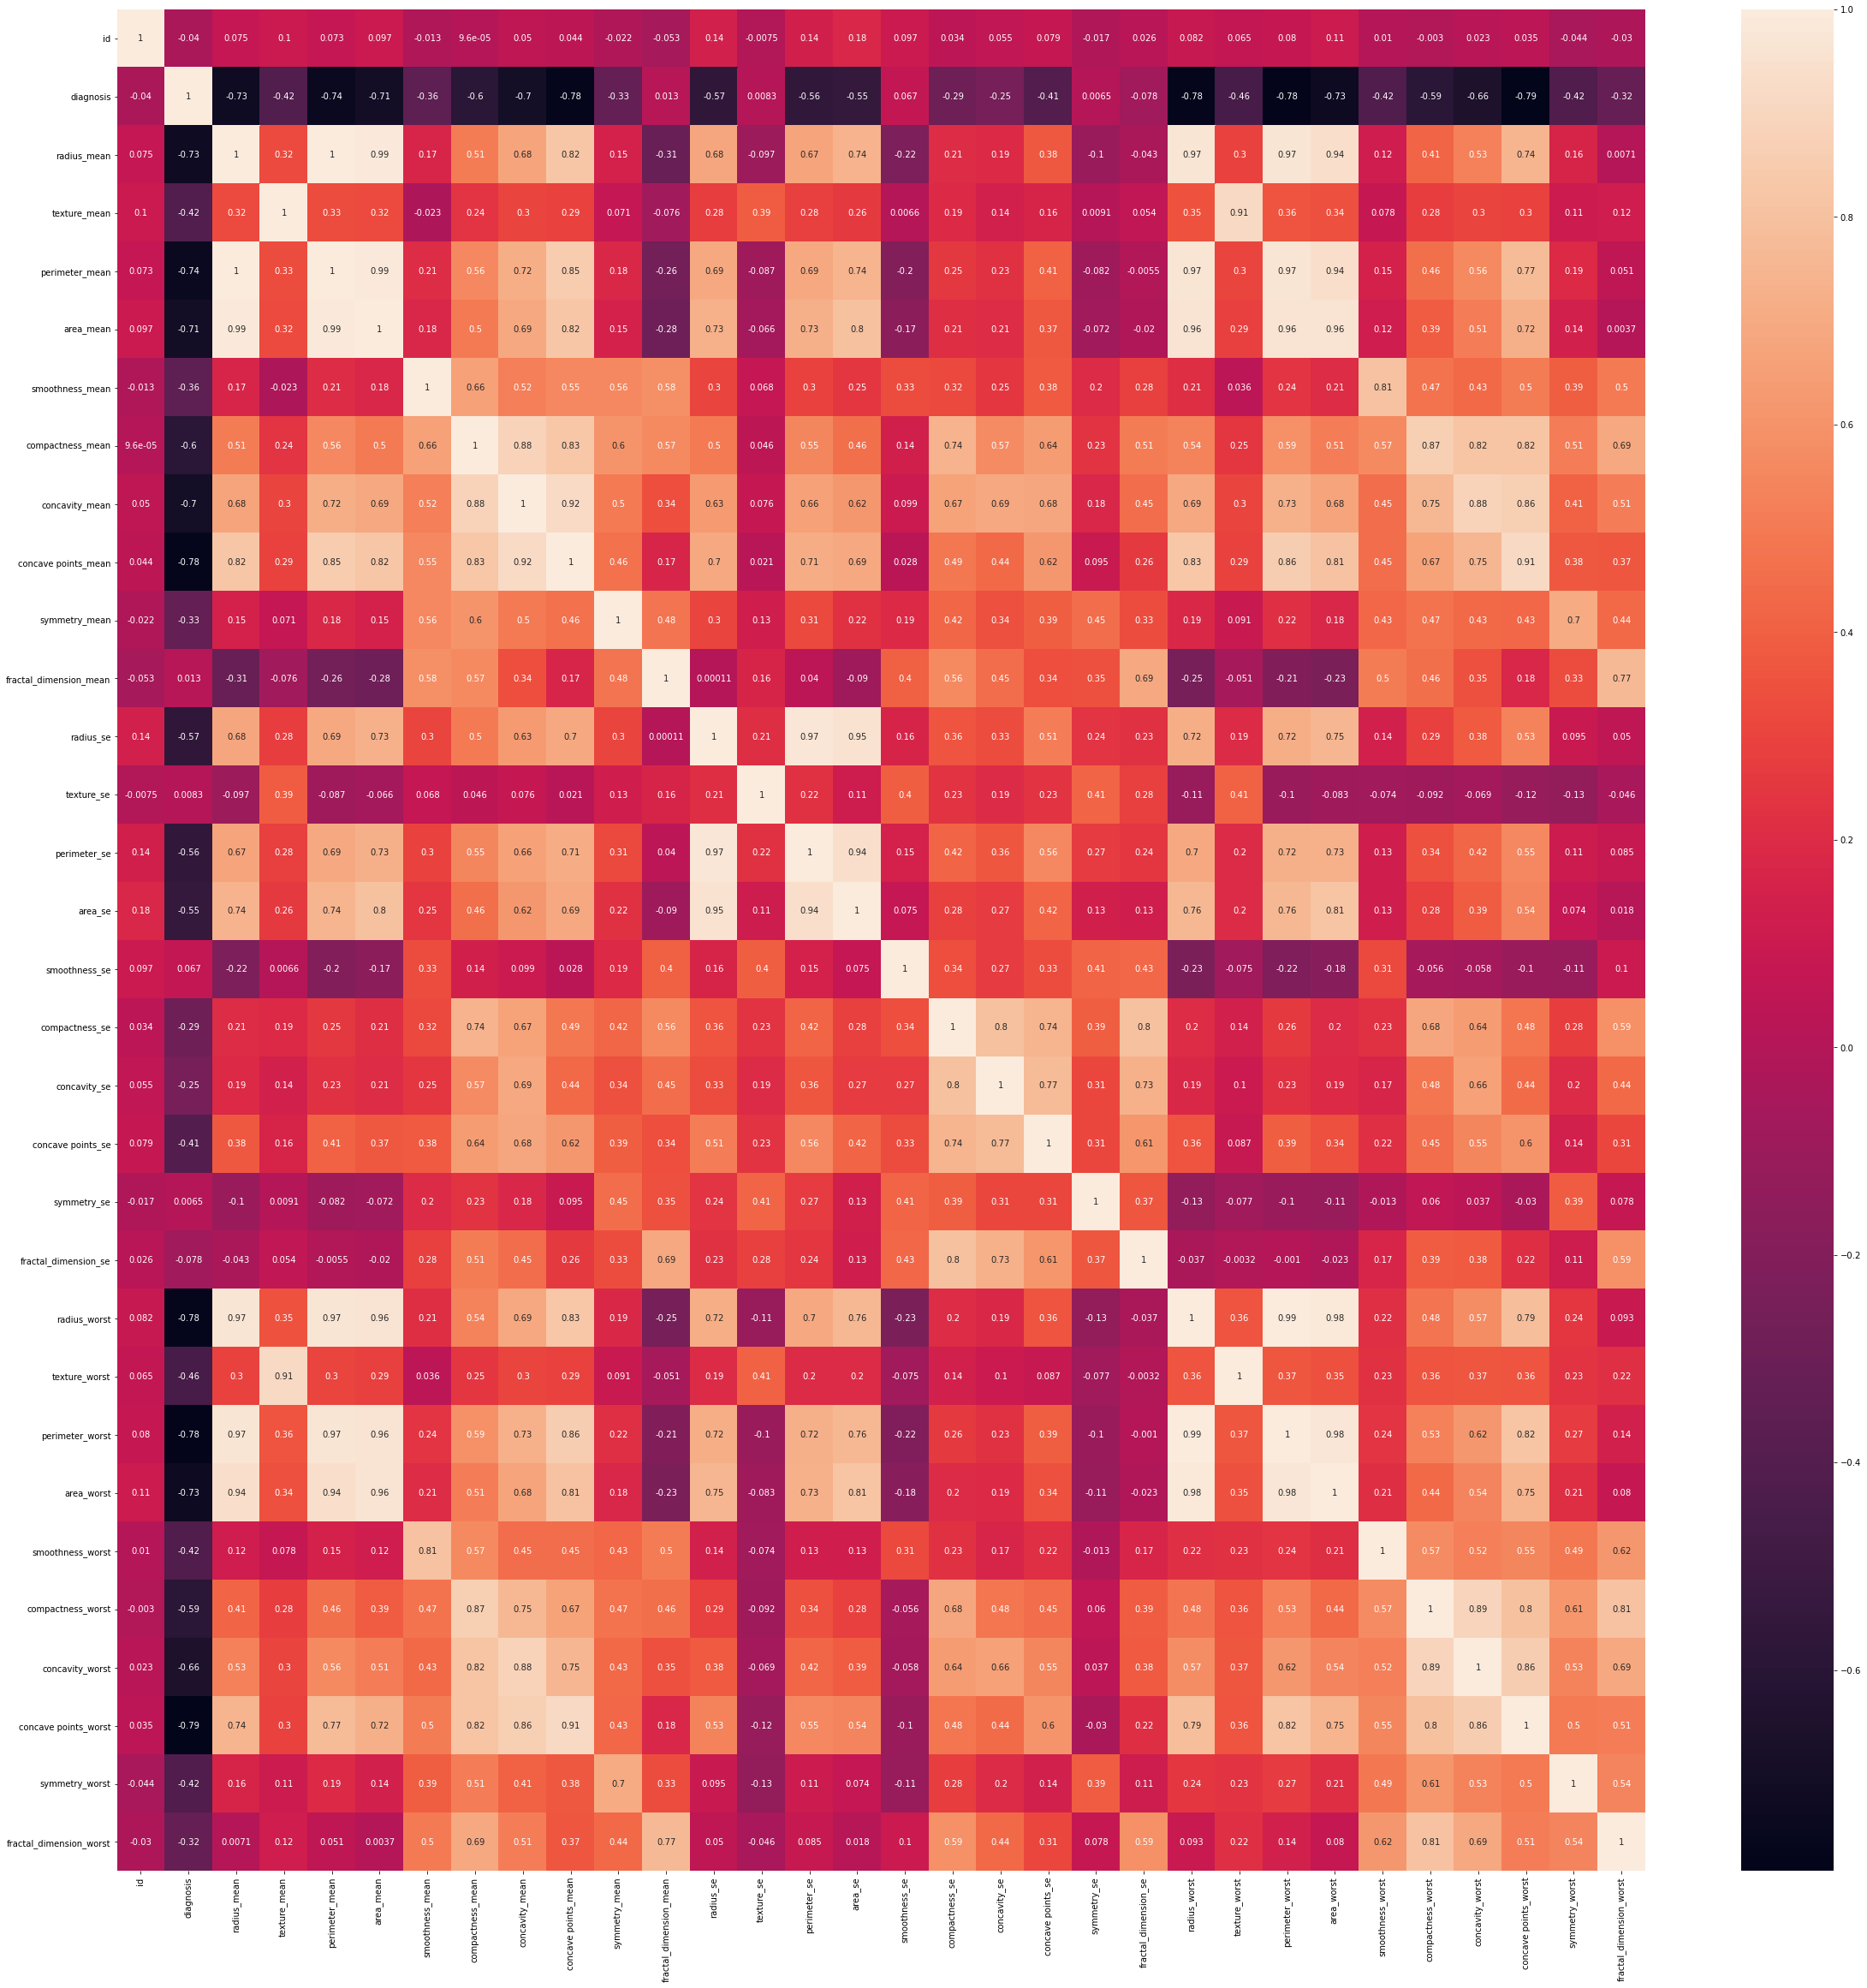

In [92]:
plt.figure(figsize = (40,40))
sns.heatmap(df.corr(),annot=True)

In [93]:
df.corr()['diagnosis'].sort_values()

concave points_worst      -0.793566
perimeter_worst           -0.782914
concave points_mean       -0.776614
radius_worst              -0.776454
perimeter_mean            -0.742636
area_worst                -0.733825
radius_mean               -0.730029
area_mean                 -0.708984
concavity_mean            -0.696360
concavity_worst           -0.659610
compactness_mean          -0.596534
compactness_worst         -0.590998
radius_se                 -0.567134
perimeter_se              -0.556141
area_se                   -0.548236
texture_worst             -0.456903
smoothness_worst          -0.421465
symmetry_worst            -0.416294
texture_mean              -0.415185
concave points_se         -0.408042
smoothness_mean           -0.358560
symmetry_mean             -0.330499
fractal_dimension_worst   -0.323872
compactness_se            -0.292999
concavity_se              -0.253730
fractal_dimension_se      -0.077972
id                        -0.039769
symmetry_se                0

# Logistic Regression Model

## Use Logistic Regression

Use Logistic Regression and examine accuracy score, confusion matrix, classification report for that model.

- Define Target, Predictors
- Train-Test Split
- Evaluate Model

In [44]:
lr = LogisticRegression(max_iter=1000)

In [ ]:
'radius_mean','texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'

In [244]:
X=df[['radius_mean','texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]
Y=df.diagnosis

In [100]:
# X1=df[[col for col in df.columns if col != "diagnosis" or col != '']] list comprehension method to do the same thing as X

In [102]:
# X1.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [249]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 42)
lr.fit(X_train,y_train)
print(lr.coef_,lr.intercept_)
# Score
accuracy_score(lr.predict(X_test), y_test)

[[ 2.05592217  0.0936048  -0.19120899  0.00557363 -0.19916843 -0.30433847
  -0.72589099 -0.48626097 -0.24522082 -0.00755117 -0.05781329  0.82397045
   0.16786925 -0.09429989 -0.03433433  0.14361071  0.0738231  -0.04883906
  -0.02794899  0.02586308  1.18811267 -0.3495372  -0.09606819 -0.02450587
  -0.38215005 -0.65938351 -1.49374161 -0.77719751 -0.85824431 -0.04603575]] [6.50659527]


C:\Users\YC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.956140350877193

In [250]:
lr.score(X_test,y_test) # another way where it helps u to do the predict

0.956140350877193

In [251]:
y_pred_class = lr.predict(X_test)
print(metrics.confusion_matrix(y_test, y_pred_class))
print(np.asarray([['TN', 'FP'], ['FN', 'TP']]))

[[39  4]
 [ 1 70]]
[['TN' 'FP']
 ['FN' 'TP']]


In [252]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_class))
print("Precision:",metrics.precision_score(y_test, y_pred_class))
print("Recall:",metrics.recall_score(y_test, y_pred_class))

Accuracy: 0.956140350877193
Precision: 0.9459459459459459
Recall: 0.9859154929577465


In [111]:
lr.predict(X_test)

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1], dtype=int64)

In [112]:
np.array(y_test)

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1], dtype=int64)

In [97]:
from sklearn.metrics import classification_report

In [253]:
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



# Support Vector Machine

## Use Support Vector Machine

Use Support Vector Machine and examine accuracy score, confusion matrix, classification report for that model.

- Define Target, Predictors
- Train-Test Split
- Evaluate Model

In [223]:
X=df[['radius_mean','texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]
Y=df.diagnosis

In [254]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state = 42)

In [136]:
from sklearn import svm

In [255]:
clf=svm.SVC()
clf.fit(X_train,y_train)


SVC()

In [256]:
y_pred_class = clf.predict(X_test)

In [257]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_class))
print("Precision:",metrics.precision_score(y_test, y_pred_class))
print("Recall:",metrics.recall_score(y_test, y_pred_class))

Accuracy: 0.9473684210526315
Precision: 0.922077922077922
Recall: 1.0


In [258]:
print(metrics.confusion_matrix(y_test, y_pred_class))
print(np.asarray([['TN', 'FP'], ['FN', 'TP']]))


[[37  6]
 [ 0 71]]
[['TN' 'FP']
 ['FN' 'TP']]


training for model: SVC


Score for SVC:
94.73684210526315


Text(0.5, 1.0, 'Confusion Matrix for SVC\n Accuracy : 94.74%')

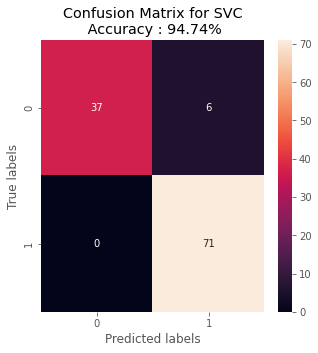

In [259]:
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
    model=SVC()
    model_name=model.__class__.__name__
    
    print(f"training for model: {model_name}\n\n")
    
    model.fit(X_train,y_train)
    score = model.score(X_test,y_test)*100
    
    print(f"Score for {model_name}:\n{score}")
    
    y_pred=model.predict(X_test)
    cm= confusion_matrix(y_test,y_pred)
    plt.figure(figsize=(5,5))
    ax=plt.subplot()
    sns.heatmap(cm,annot=True,fmt='g',ax=ax)
    
    ax.set_xlabel('Predicted labels');
    ax.set_ylabel('True labels');
    ax.set_title(f'Confusion Matrix for {model_name}\n Accuracy : {score:.2f}%')

In [260]:
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92        43
           1       0.92      1.00      0.96        71

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



In [277]:
def train_and_score_model(model,X,y):
    
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
    model_name=model.__class__.__name__
    
    print(f"training for model: {model_name}\n\n")
    
    model.fit(X_train,y_train)
    score = model.score(X_test,y_test)*100
    
    
    print(f"Score for {model_name}:\n{score}:\n\n")
    
    y_pred=model.predict(X_test)
    
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print("Precision:",metrics.precision_score(y_test, y_pred))
    print("Recall:",metrics.recall_score(y_test, y_pred),"\n\n")
    
    cm= confusion_matrix(y_test,y_pred)
    plt.figure(figsize=(5,5))
    ax=plt.subplot()
    sns.heatmap(cm,annot=True,fmt='g',ax=ax)
    
    ax.set_xlabel('Predicted labels');
    ax.set_ylabel('True labels');
    ax.set_title(f'Confusion Matrix for {model_name}\n Accuracy : {score:.2f}%')

In [151]:
df.head(1)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,0,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189


In [ ]:
# X1=df[[col for col in df.columns if col != "diagnosis" or col != '']] list comprehension method to do the same thing as X

In [ ]:
[col for col in df.columns if any(s in col for s in ['spike', 'foo', 'bar'])]

In [206]:
X=df[[col for col in df.columns if col != "id" and col !="diagnosis" ]] 

In [207]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


training for model: LogisticRegression


Score for LogisticRegression:
95.6140350877193:


Accuracy: 0.956140350877193
Precision: 0.9459459459459459
Recall: 0.9859154929577465 


training for model: SVC


Score for SVC:
94.73684210526315:


Accuracy: 0.9473684210526315
Precision: 0.922077922077922
Recall: 1.0 




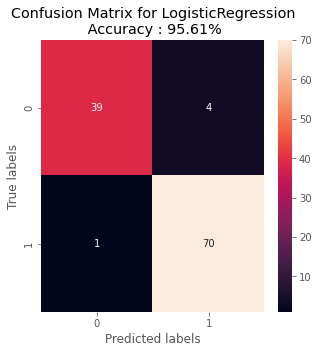

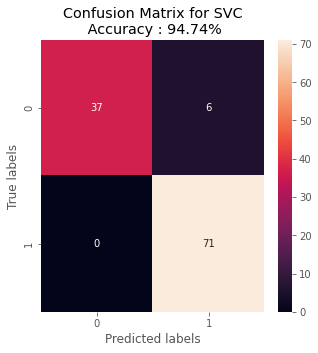

In [278]:
models_test = [LogisticRegression(max_iter=4000),SVC()]
target_col = "diagnosis"
X=df[[col for col in df.columns if col != "id" and col !="diagnosis" ]] 
y=df[target_col]
for m in models_test:
    train_and_score_model(m,X,y)

In [268]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_class))
print("Precision:",metrics.precision_score(y_test, y_pred_class))
print("Recall:",metrics.recall_score(y_test, y_pred_class))

Accuracy: 0.9473684210526315
Precision: 0.922077922077922
Recall: 1.0


# Naive Bayes
## Use Naive Bayes

Use Naive Bayes and examine accuracy score, confusion matrix, classification report for that model.

- Define Target, Predictors
- Train-Test Split
- Evaluate Model

In [235]:
from sklearn.naive_bayes import GaussianNB

plt.style.use('ggplot')

In [327]:
model=GaussianNB()

In [269]:
X=df[[col for col in df.columns if col != "id" and col !="diagnosis" ]] 
y=df.diagnosis

training for model: GaussianNB


Score for GaussianNB:
97.36842105263158:




Text(0.5, 1.0, 'Confusion Matrix for GaussianNB\n Accuracy : 97.37%')

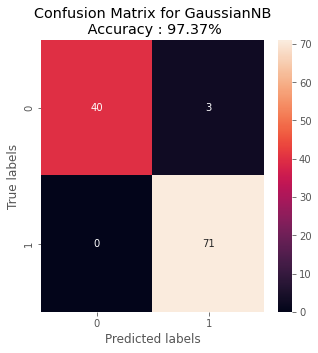

In [270]:
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
    model=GaussianNB()
    model_name=model.__class__.__name__
    
    print(f"training for model: {model_name}\n\n")
    
    model.fit(X_train,y_train)
    score = model.score(X_test,y_test)*100
    
    print(f"Score for {model_name}:\n{score}:\n\n")
    
    y_pred=model.predict(X_test)
    cm= confusion_matrix(y_test,y_pred)
    plt.figure(figsize=(5,5))
    ax=plt.subplot()
    sns.heatmap(cm,annot=True,fmt='g',ax=ax)
    
    ax.set_xlabel('Predicted labels');
    ax.set_ylabel('True labels');
    ax.set_title(f'Confusion Matrix for {model_name}\n Accuracy : {score:.2f}%')

In [272]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9736842105263158
Precision: 0.9594594594594594
Recall: 1.0


training for model: LogisticRegression


Score for LogisticRegression:
95.6140350877193:


Accuracy: 0.956140350877193
Precision: 0.9459459459459459
Recall: 0.9859154929577465 


training for model: SVC


Score for SVC:
94.73684210526315:


Accuracy: 0.9473684210526315
Precision: 0.922077922077922
Recall: 1.0 


training for model: GaussianNB


Score for GaussianNB:
97.36842105263158:


Accuracy: 0.9736842105263158
Precision: 0.9594594594594594
Recall: 1.0 




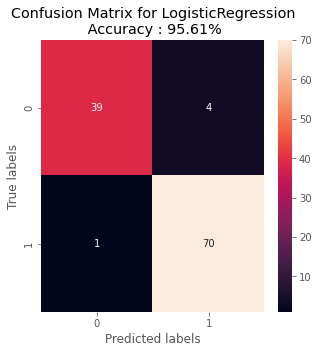

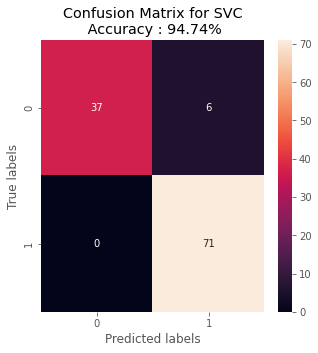

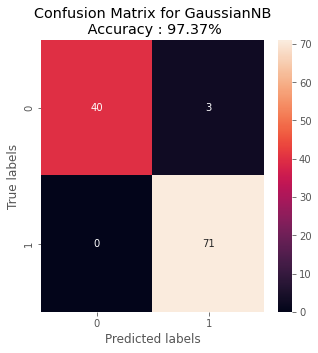

In [279]:
models_test = [LogisticRegression(max_iter=4000),SVC(),GaussianNB()]
target_col = "diagnosis"
X=df[[col for col in df.columns if col != "id" and col !="diagnosis" ]] 
y=df[target_col]
for m in models_test:
    train_and_score_model(m,X,y)

# Gridsearch optimal parameters for all three models.

Is there any difference between accuracy score of Logistic Regression and SVM? Use grid search to find optimal parameter for both these models.

> Hyper-parameters are parameters that are not directly learnt within estimators. In scikit-learn they are passed as arguments to the constructor of the estimator classes. Typical examples include C, kernel and gamma for Support Vector Classifier, alpha for Lasso, etc.

> It is possible and recommended to search the hyper-parameter space for the best cross validation score.

> https://scikit-learn.org/stable/modules/grid_search.html#grid-search

**Note:** It'll take time to execute this. After running the cell, wait for result.

## Find Best Estimator For Logistic Regression 

Find out how these parameters effect model. Find out the best estimator, score.

In [280]:
lr_params = {
    'penalty': ['l1','l2'],
    'C': [1, 10, 100]
}

In [284]:
from sklearn.model_selection import GridSearchCV

In [301]:
lr=LogisticRegression(solver='liblinear',max_iter=3000)

In [304]:
clf = GridSearchCV(lr, lr_params)
clf.fit(X,y)
sorted(clf.cv_results_.keys())


['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_C',
 'param_penalty',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [315]:
clf.cv_results_

{'mean_fit_time': array([0.18427906, 0.00418868, 0.20992074, 0.00459032, 0.48570576,
        0.00524354]),
 'std_fit_time': array([0.07459777, 0.00038729, 0.15827924, 0.00067954, 0.33427484,
        0.00042715]),
 'mean_score_time': array([0.00120759, 0.00141387, 0.00149417, 0.00098872, 0.00102382,
        0.00148597]),
 'std_score_time': array([3.94535249e-04, 5.07332046e-04, 4.64604444e-04, 3.87390208e-05,
        4.10045023e-05, 4.18629395e-04]),
 'param_C': masked_array(data=[1, 1, 10, 10, 100, 100],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_penalty': masked_array(data=['l1', 'l2', 'l1', 'l2', 'l1', 'l2'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'penalty': 'l1'},
  {'C': 1, 'penalty': 'l2'},
  {'C': 10, 'penalty': 'l1'},
  {'C': 10, 'penalty': 'l2'},
  {'C': 100, 'penalty': 'l1'},
  {'C': 100, 'penalty': 'l2

In [309]:
clf.get_params()

{'cv': None,
 'error_score': nan,
 'estimator__C': 1.0,
 'estimator__class_weight': None,
 'estimator__dual': False,
 'estimator__fit_intercept': True,
 'estimator__intercept_scaling': 1,
 'estimator__l1_ratio': None,
 'estimator__max_iter': 3000,
 'estimator__multi_class': 'auto',
 'estimator__n_jobs': None,
 'estimator__penalty': 'l2',
 'estimator__random_state': None,
 'estimator__solver': 'liblinear',
 'estimator__tol': 0.0001,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': LogisticRegression(max_iter=3000, solver='liblinear'),
 'n_jobs': None,
 'param_grid': {'penalty': ['l1', 'l2'], 'C': [1, 10, 100]},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 0}

In [305]:
clf.score(X_test,y_test)

0.9912280701754386

## Find Best Estimator For SVM

Find out how these parameters effect model. Find out the best estimator, score.

In [281]:
svc_params = {
    'C': [1, 10, 100],
    'gamma': [0.001, 0.0001],
    'kernel': ['linear','rbf']
}

In [362]:
svc=svm.SVC(probability=True)

In [363]:

SVC_Model = GridSearchCV(svc, svc_params)
SVC_Model.fit(X,y)
#sorted(SVC_Model.cv_results_.keys())


GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [1, 10, 100], 'gamma': [0.001, 0.0001],
                         'kernel': ['linear', 'rbf']})

In [383]:
SVC_Model.best_params_

{'C': 100, 'gamma': 0.001, 'kernel': 'linear'}

In [364]:
SVC_Model.get_params()

{'cv': None,
 'error_score': nan,
 'estimator__C': 1.0,
 'estimator__break_ties': False,
 'estimator__cache_size': 200,
 'estimator__class_weight': None,
 'estimator__coef0': 0.0,
 'estimator__decision_function_shape': 'ovr',
 'estimator__degree': 3,
 'estimator__gamma': 'scale',
 'estimator__kernel': 'rbf',
 'estimator__max_iter': -1,
 'estimator__probability': True,
 'estimator__random_state': None,
 'estimator__shrinking': True,
 'estimator__tol': 0.001,
 'estimator__verbose': False,
 'estimator': SVC(probability=True),
 'n_jobs': None,
 'param_grid': {'C': [1, 10, 100],
  'gamma': [0.001, 0.0001],
  'kernel': ['linear', 'rbf']},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 0}

In [323]:
SVC_Model.cv_results_

{'mean_fit_time': array([7.81843805e-01, 1.04040146e-02, 7.68927479e-01, 4.78358269e-03,
        2.27985263e+00, 1.01928234e-02, 2.34596629e+00, 5.59744835e-03,
        5.94028206e+00, 1.07930660e-02, 5.81355748e+00, 5.56631088e-03]),
 'std_fit_time': array([3.01130078e-01, 4.97915374e-04, 3.07329945e-01, 4.31532212e-04,
        4.86821306e-01, 4.22042812e-04, 5.83924010e-01, 4.89020547e-04,
        1.63095124e+00, 4.00723167e-04, 1.62388933e+00, 5.32096587e-04]),
 'mean_score_time': array([0.00122352, 0.00441179, 0.00142193, 0.00279794, 0.00119901,
        0.0046629 , 0.0009944 , 0.0019918 , 0.00141983, 0.0044106 ,
        0.00118785, 0.00242677]),
 'std_score_time': array([3.94459872e-04, 5.02265225e-04, 4.51046315e-04, 3.86410445e-04,
        4.04673382e-04, 7.38954047e-04, 5.38178705e-05, 2.92240886e-05,
        5.15208425e-04, 5.21331532e-04, 3.72388188e-04, 5.29869329e-04]),
 'param_C': masked_array(data=[1, 1, 1, 1, 10, 10, 10, 10, 100, 100, 100, 100],
              mask=[False,

In [365]:
SVC_Model.score(X_test,y_test)

0.9649122807017544

## Plot the ROC curve for the SVM, Logistic Regressions and Naive Bayes on the same plot

Find out which model performs better.

In [344]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state = 42)

In [345]:
lr_est_preds = clf.predict_proba(X_test)[:,1]
# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
lr_est_fpr, lr_est_tpr, _ = metrics.roc_curve(y_test, lr_est_preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
lr_est_roc_auc = metrics.auc(lr_est_fpr, lr_est_tpr)


In [372]:
lr_est_roc_auc

0.9993449066491975

In [366]:
SVC_est_preds = SVC_Model.predict_proba(X_test)[:,1]
# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
SVC_est_fpr, SVC_est_tpr, _ = metrics.roc_curve(y_test, SVC_est_preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
SVC_est_roc_auc = metrics.auc(SVC_est_fpr, SVC_est_tpr)


In [371]:
SVC_est_roc_auc

0.9950867998689814

In [346]:
#model=GaussianNB() from previous
model.fit(X,y)
Naive_est_preds = model.predict_proba(X_test)[:,1]
# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
Naive_est_fpr, Naive_est_tpr, _ = metrics.roc_curve(y_test, Naive_est_preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
Naive_est_roc_auc = metrics.auc(Naive_est_fpr, Naive_est_tpr)


In [369]:
Naive_est_roc_auc

0.9983622666229938

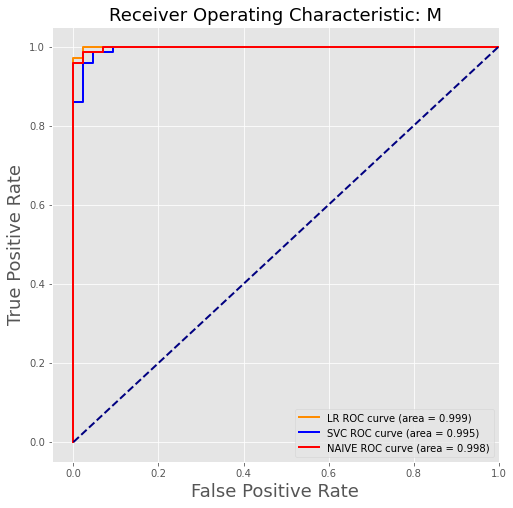

In [373]:
lw=2
plt.figure(figsize=[8,8])

plt.plot(lr_est_fpr, lr_est_tpr, color='darkorange', lw = lw, label = 'LR ROC curve (area = %0.3f)' % lr_est_roc_auc)
plt.plot(SVC_est_fpr, SVC_est_tpr, color='blue', lw = lw, label = 'SVC ROC curve (area = %0.3f)' % SVC_est_roc_auc)
plt.plot(Naive_est_fpr, Naive_est_tpr, color='red', lw = lw, label = 'NAIVE ROC curve (area = %0.3f)' % Naive_est_roc_auc)

plt.plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')

plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver Operating Characteristic: M', fontsize=18)
plt.legend(loc="lower right")
plt.show()

# [BONUS] Learning Curve

A learning curve shows the validation and training score of an estimator for varying numbers of training samples. It is a tool to find out how much we benefit from adding more training data and whether the estimator suffers more from a variance error or a bias error. If both the validation score and the training score converge to a value that is too low with increasing size of the training set, we will not benefit much from more training data.

Plot "learning curves" for the best models of each. This is a great way see how training/testing size affects the scores. Look at the documentation for how to use this function in sklearn.

http://scikit-learn.org/stable/modules/learning_curve.html#learning-curves

In [0]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py

In [376]:
from sklearn.model_selection import learning_curve

In [393]:
def plot_learning_curve_ryan(model,n_jobs=-1):
    train_sizes, train_scores, test_scores = learning_curve(model,X,y,train_sizes=np.linspace(0.1,1,10),cv=3,n_jobs=n_jobs)
    mean_train_scores = [np.mean(scores) for scores in train_scores]
    mean_test_scores = [np.mean(scores) for scores in test_scores]
    plt.plot(train_sizes,mean_test_scores,color='red',lw=3)
    plt.plot(train_sizes,mean_train_scores,color='blue',lw=3)

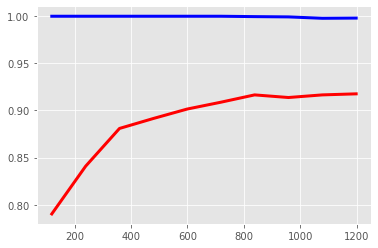

In [395]:
plot_learning_curve_ryan(clf)

<module 'matplotlib.pyplot' from 'C:\\Users\\YC\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

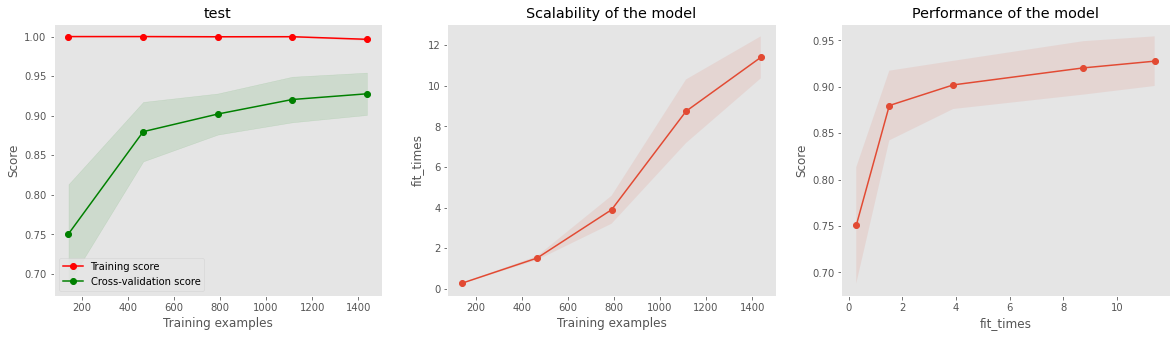

In [390]:
plot_learning_curve(clf,"test",X,y,n_jobs=-1)

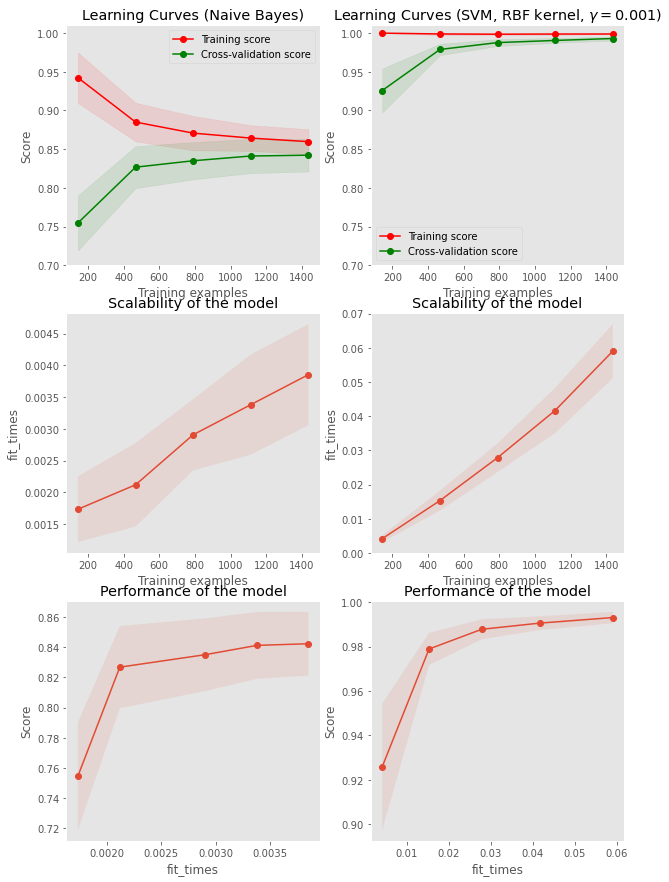

In [394]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, "o-")
    axes[2].fill_between(
        fit_times_mean,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


fig, axes = plt.subplots(3, 2, figsize=(10, 15))

X, y = load_digits(return_X_y=True)

title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = GaussianNB()
plot_learning_curve(
    estimator, title, X, y, axes=axes[:, 0], ylim=(0.7, 1.01), cv=cv, n_jobs=4
)

title = r"Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = SVC(gamma=0.001)
plot_learning_curve(
    estimator, title, X, y, axes=axes[:, 1], ylim=(0.7, 1.01), cv=cv, n_jobs=4
)

plt.show()

**References**

[Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/downloads/breast-cancer-wisconsin-data.zip/2)

[Validation curves: plotting scores to evaluate models](https://scikit-learn.org/stable/modules/learning_curve.html#learning-curves)

[In-Depth: Support Vector Machines](https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html)

[Understanding Support Vector Machine algorithm from examples (along with code)](https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/)

[Tuning the hyper-parameters of an estimator](https://scikit-learn.org/stable/modules/grid_search.html#grid-search)